In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from sklearn_extra.cluster import KMedoids

In [2]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

<Figure size 1500x1200 with 0 Axes>

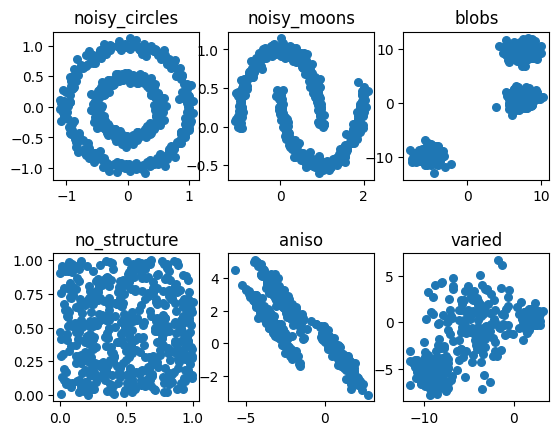

In [3]:
datasets = [noisy_circles,noisy_moons,blobs,no_structure,aniso, varied]
names =['noisy_circles','noisy_moons','blobs','no_structure','aniso', 'varied']
plt.figure(figsize=(15,12))
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(hspace=0.5)
for index,i in enumerate(datasets):
    row,col = index//3, index%3
    ax=axes[row,col]
    ax.scatter(i[0][:, 0], i[0][:, 1], s=30)
    ax.set_title(names[index])
plt.show()

C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


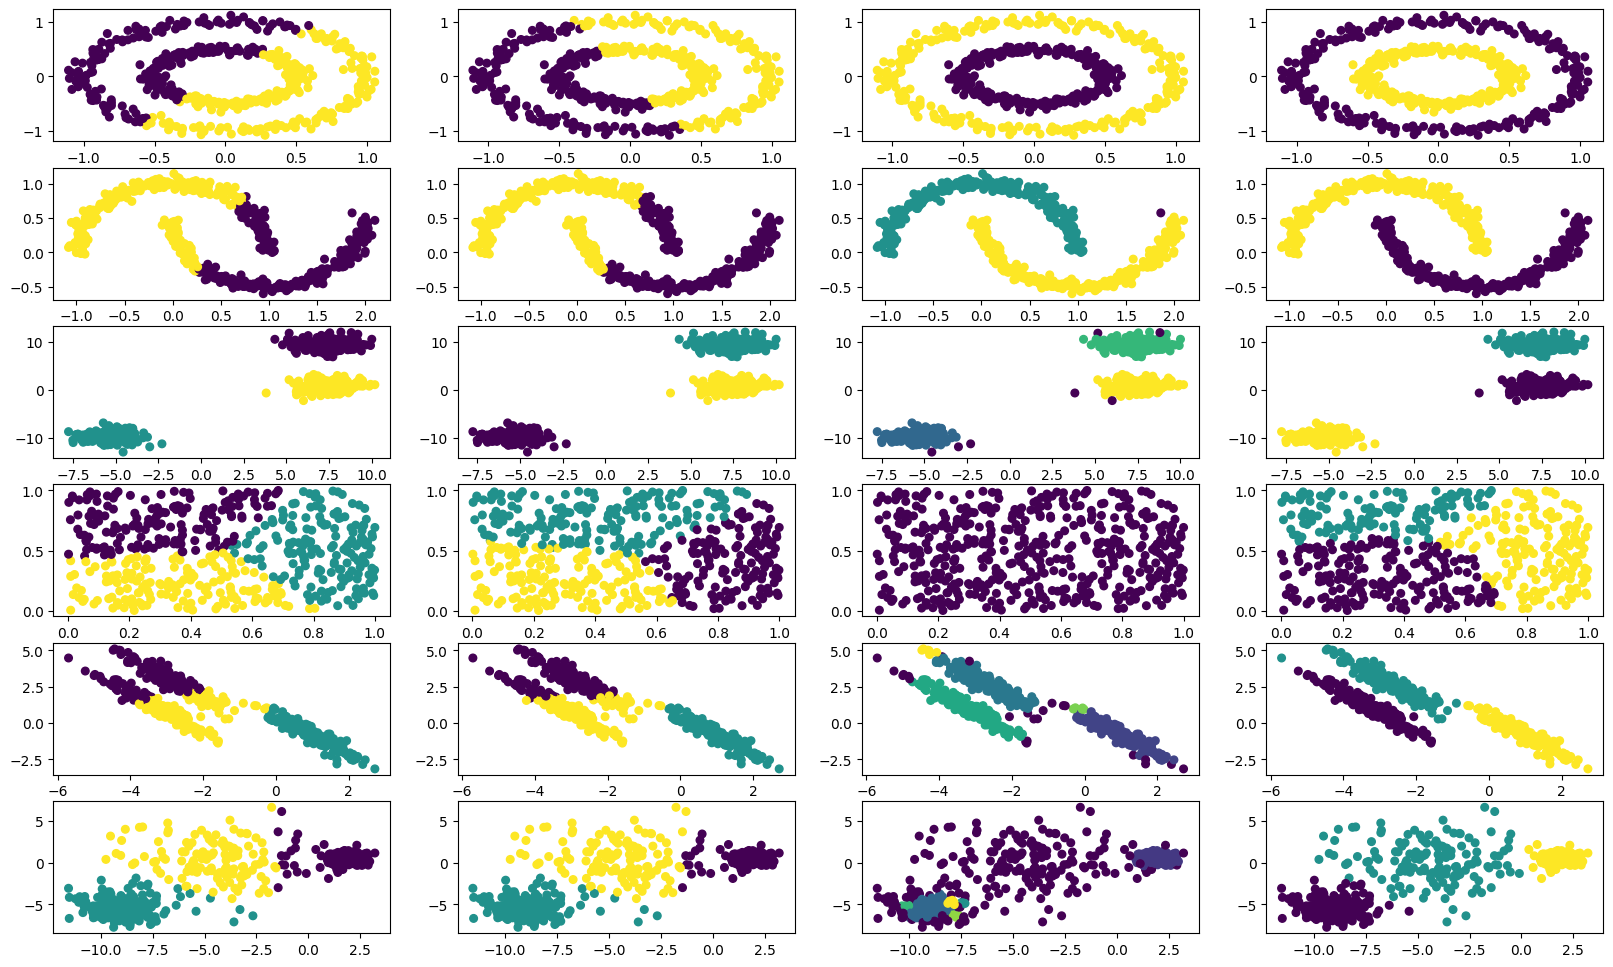

In [9]:
datasets = [noisy_circles,noisy_moons,blobs,no_structure,aniso, varied]
names =['noisy_circles','noisy_moons','blobs','no_structure','aniso', 'varied']
num_cluster = [2,2,3,3,3,3]
eps_s = [0.18,0.15,0.9,0.5,0.3,0.3]
plt.figure(figsize=(20,12))

plot_num = 1
for index,i in enumerate(datasets):
        kmeans = cluster.KMeans(num_cluster[index]).fit_predict(i[0])
        kmediods = KMedoids(num_cluster[index]).fit_predict(i[0])
        dbscan = cluster.DBSCAN(eps=eps_s[index]).fit_predict(i[0])
        spectral = cluster.SpectralClustering(num_cluster[index],eigen_solver="arpack",affinity="nearest_neighbors").fit_predict(i[0])
        methods = [kmeans, kmediods, dbscan,spectral]
        for method in methods:
                plt.subplot(6, 4,plot_num)
                plt.scatter(i[0][:, 0], i[0][:, 1], s=30,c=method)
                plot_num += 1
plt.show()

Se Puede ver que en los datos donde la relacion no es muy lienal funcionan muy bien los métodos de DBSCAN y Spaectral Clustering funcioncio, mientras que  en los conjuntos que se pueden diferenciar muy bien mediante la medidas gaaussianas podría tener un mejor desemepeño los método como kmean o kmedoides. Además vemos que en el dataset no estructurado le método DBSCAN no logra diferenciaar entre cluster pues este método se basa en la densidad de los puntos. Es Posible que el algoritmo mas robusto sea el spectral